In [32]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import numpy as np
import datasets
import os
import sys
import importlib

import io
import joblib
import ast
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

from datasets import load_dataset
import datasets
import pandas as pd
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from langdetect import detect

from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


os.environ["TOKENIZERS_PARALLELISM"] = "false"

import warnings

# Disable the specific UserWarning
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

# Performing TFIDF vectorisation
tfidf_vectorizer = TfidfVectorizer()



In [33]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
src_data_directory = os.path.join(parent_directory, "src", "model")

sys.path.append(src_data_directory)

In [42]:
import model_train
importlib.reload(model_train)

Enter 1 if only question given              :
Enter 2 if only image given                 :
Enter 3 if both question and image given    :
Data Frame Obtained


<module 'model_train' from '/Users/psinha/Desktop/Structred Folder/src/model/model_train.py'>

## Deploying Random Forest

### Finding the best max_depth of random forest

In [13]:
# This model will tell how much max depth is most sutable
# We will pass a list of possible max depths

max_depth_list = [5, 10, 20, 50]
model_train.best_max_depth_for_forest(max_depth_list)

# We observe that depth of 50 works best
# The more we increase depth, the better it will be. we will settle for 50

Best Parameters: {'max_depth': 50}
Best Accuracy: 0.9542776105579996
Test Accuracy with Best Parameters: 0.9552746718522119


### Finding how many trees are required in our forest

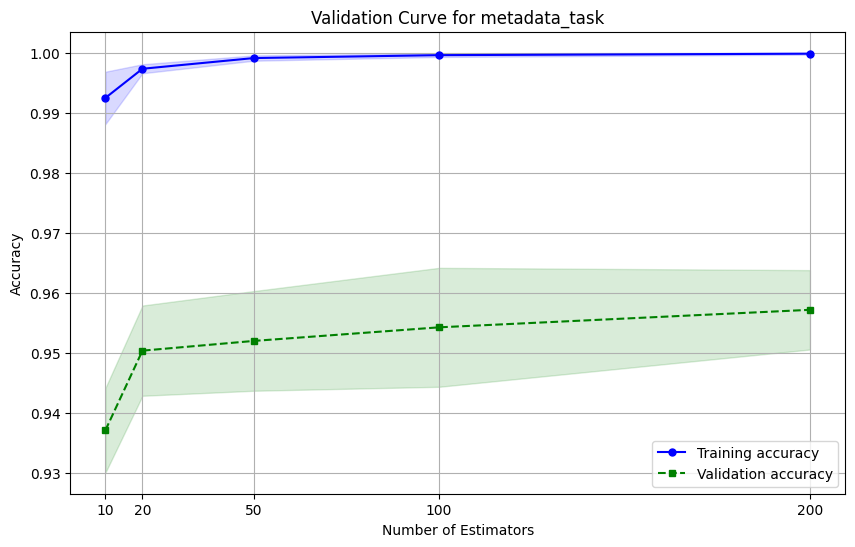

In [14]:
# This function will plot training and validation accuracy for our training and validation
# From below plot, we can see that after 20 trees, there is not much increase in accuracy
# In our random forest , we will use 20 trees

model_train.best_No_of_estimators()

### Finally we can evaluate the Random Forest model

In [15]:

# Now we see the results of the models with parameters found by us.

rf_classifier = RandomForestClassifier(random_state=42, max_depth=50, n_estimators=20)

model_train.classifier_accuracy( rf_classifier, 'metadata_category')
model_train.classifier_accuracy( rf_classifier, 'metadata_task')
model_train.classifier_accuracy( rf_classifier, 'metadata_context')
model_train.classifier_accuracy( rf_classifier, 'metadata_grade')
model_train.classifier_accuracy( rf_classifier, 'metadata_language')


Accuracy of metadata_category: 0.9630529897909577
Accuracy of metadata_task: 0.9450656295576082
Accuracy of metadata_context: 0.9095770539620807
Accuracy of metadata_grade: 0.9319397180359748
Accuracy of metadata_language: 0.9761789013125911


### Now We will optimize svm parameters

#### Finding best hyper parameters for SVM using grid search

In [39]:
# The grid search will find the best parameters for each class

model_train.best_SVM_Hyperparameters("SVM", "accuracy")


Grid search started for answer_type
Best Parameters for answer_type : {'C': 10, 'degree': 1, 'kernel': 'rbf'}
Best accuracy for answer_type : 0.8994864131006757

Grid search started for metadata_category
Best Parameters for metadata_category : {'C': 10, 'degree': 1, 'kernel': 'linear'}
Best accuracy for metadata_category : 0.9876775979288135

Grid search started for metadata_task
Best Parameters for metadata_task : {'C': 10, 'degree': 1, 'kernel': 'linear'}
Best accuracy for metadata_task : 0.9760024416426362

Grid search started for metadata_context


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for metadata_context : {'C': 10, 'degree': 1, 'kernel': 'linear'}
Best accuracy for metadata_context : 0.9484413479551244

Grid search started for metadata_grade
Best Parameters for metadata_grade : {'C': 10, 'degree': 1, 'kernel': 'linear'}
Best accuracy for metadata_grade : 0.9481229872234733

Grid search started for metadata_language


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for metadata_language : {'C': 10, 'degree': 1, 'kernel': 'linear'}
Best accuracy for metadata_language : 0.9886526763350103
Overall Accuracy: 0.9766650461837627
Best Score from Grid Search: 0.9886526763350103


### Degree VS Accuracy for SVM model

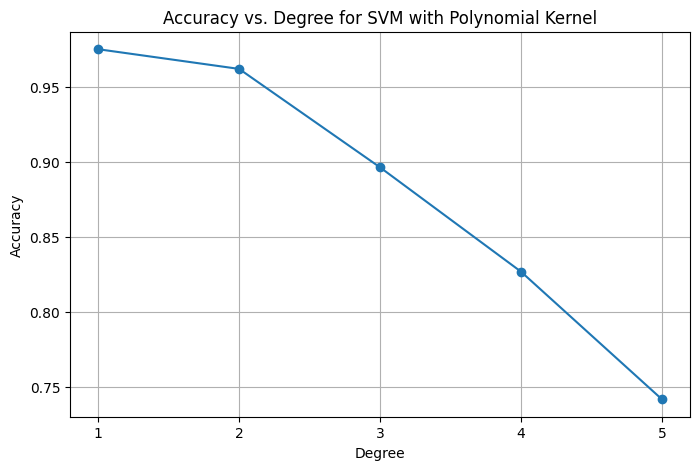

In [40]:
# This function plots degree vs accuracy
model_train.plot_accuracy_vs_degree("metadata_task")

# We can see that degree 1 will give highest accuracy

### Now we can plot the SVM after compression to get a rough idea about the boundaries

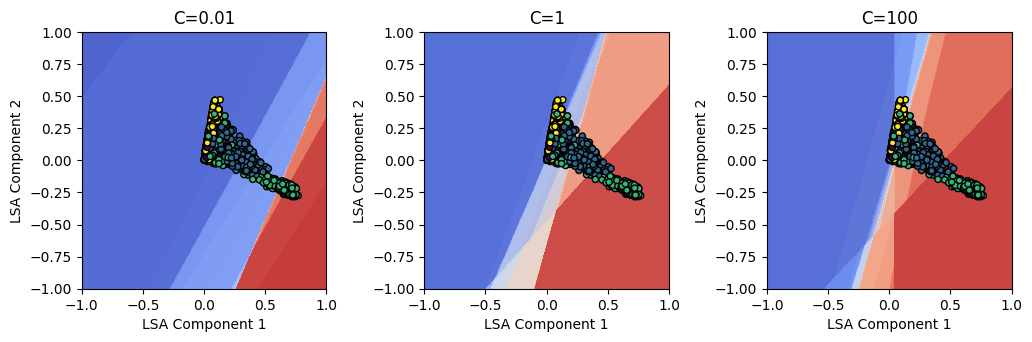

In [43]:
# This function will plot the SVM after compression 
model_train.SVM_plotter()


### We can finally use SVM as it gives best results. we will generate log files and save models

In [ ]:
log_file_path = "train_logs_Question_&_Images_only.txt"
vm_model_files = model_train.model_trainer_svm(log_file=log_file_path)